In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
from collections import Counter
import logging
from tqdm.notebook import tqdm
import powerlaw
import pickle
import os

from graph_preprocessing_utils import *
from graph_summary_utils import *

logging.basicConfig(level=logging.INFO)

os.makedirs('./figures/', exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiments on real data

Loading dataset cora


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Nodes:  19793
Edges:  146635.0
Features:  8710
Overall assortativity: 0.6700194678780013
Loading dataset cora_ml


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Nodes:  2995
Edges:  19311.0
Features:  2879
Overall assortativity: 0.845333094234735
Loading dataset citeseer


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Nodes:  4230
Edges:  14904.0
Features:  602
Overall assortativity: 0.9717779868297272
Loading dataset pubmed


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Nodes:  19717
Edges:  108365
Features:  500
Overall assortativity: 0.8632282444059275
Loading dataset dblp


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Nodes:  17716
Edges:  123450.0
Features:  1639
Overall assortativity: 0.8711162744570222
Loading dataset airport
Nodes:  1190
Edges:  28388.0
Features:  238
Overall assortativity: 0.7221583609439448
Loading dataset flickr
Nodes:  7575
Edges:  487051.0
Features:  12047
Overall assortativity: 0.26190697617998243


/home/jupyter/graph-generation/cabam-graph-generation/graph_summary_utils.py:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.title(dataset[0].upper() + dataset[1:], fontsize=16)


Loading dataset blogcatalog
Nodes:  5196
Edges:  348682.0
Features:  8189


/home/jupyter/graph-generation/cabam-graph-generation/graph_summary_utils.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if dataset:


Overall assortativity: 0.41866405936509193


/home/jupyter/graph-generation/cabam-graph-generation/graph_summary_utils.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.xlabel('Assortativity')
/home/jupyter/graph-generation/cabam-graph-generation/graph_summary_utils.py:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.title(dataset[0].upper() + dataset[1:], fontsize=16)


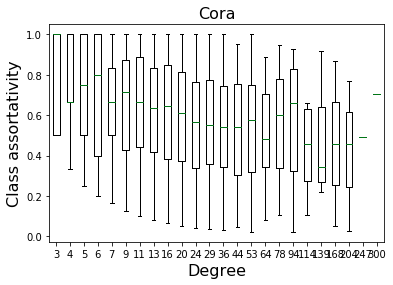

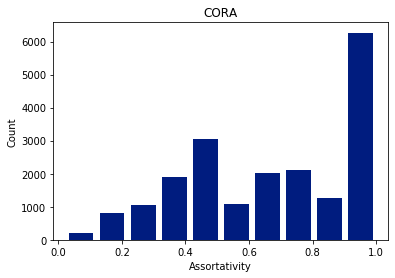

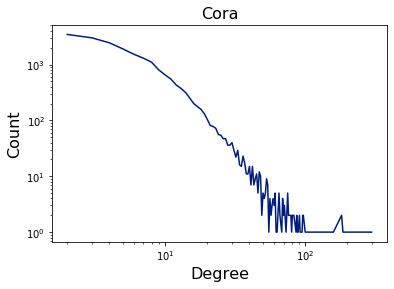

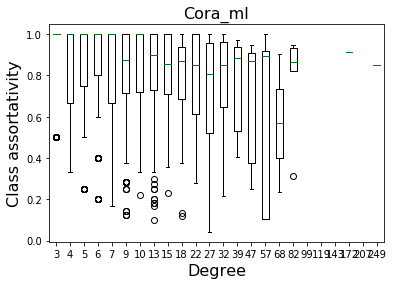

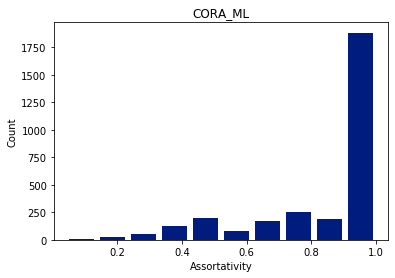

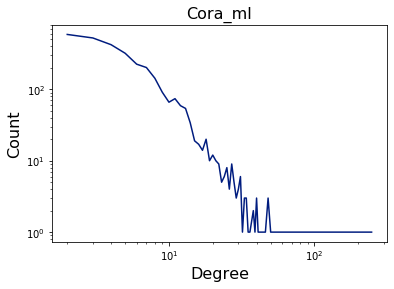

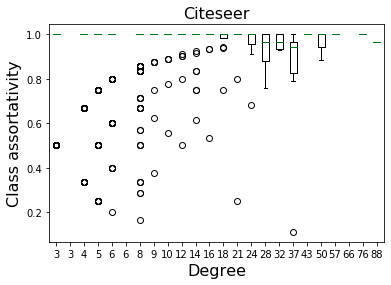

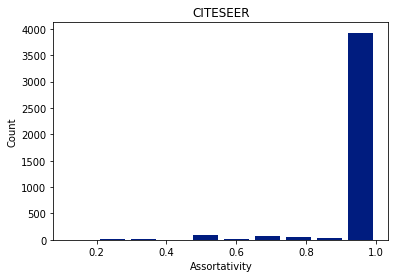

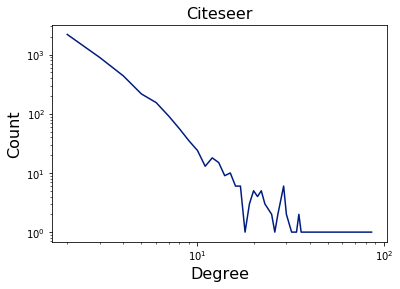

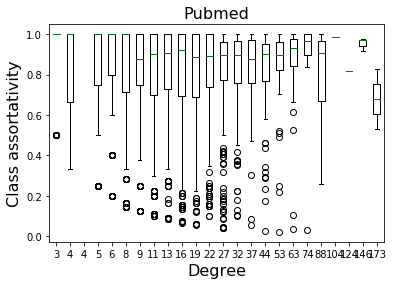

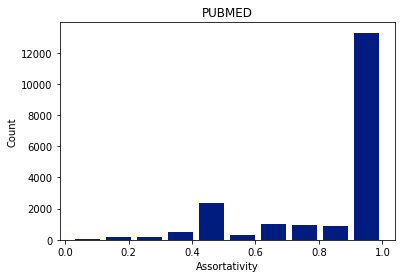

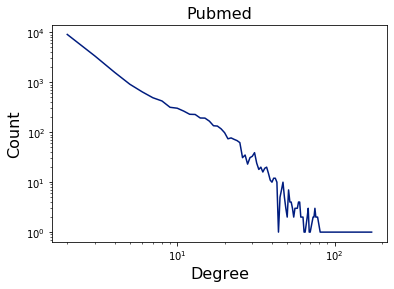

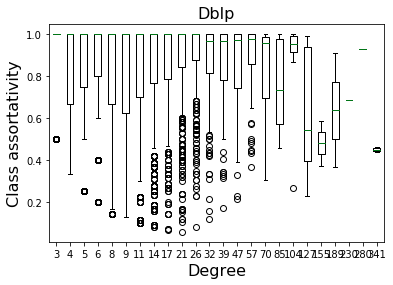

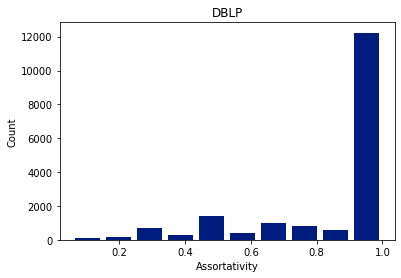

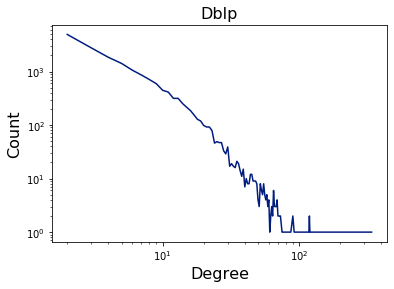

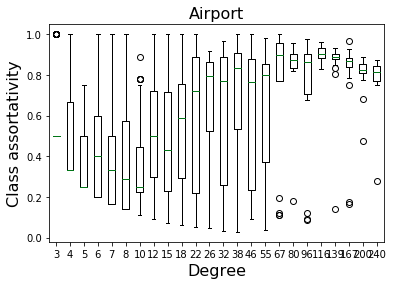

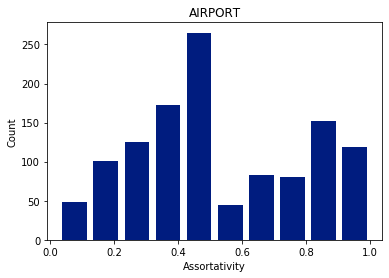

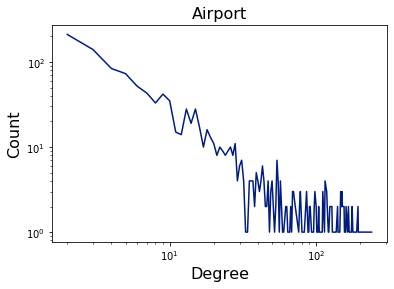

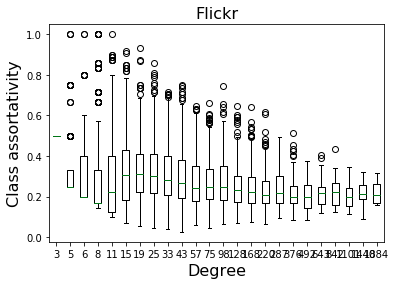

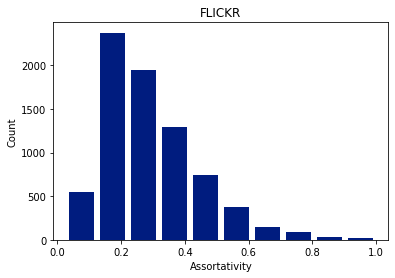

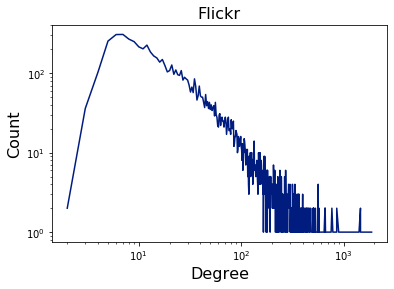

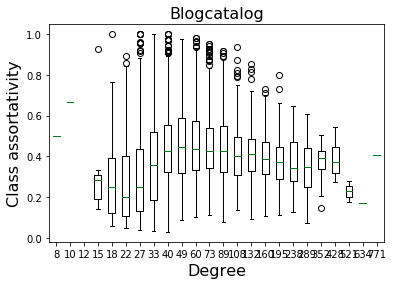

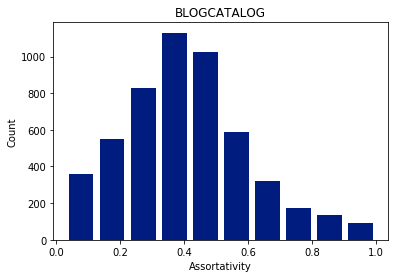

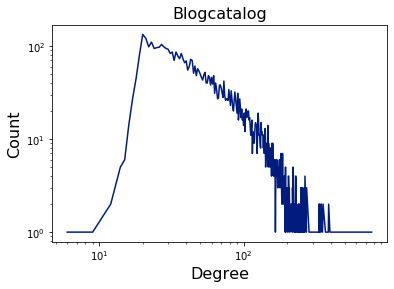

In [10]:
# planetoid datasets

plt.style.use('seaborn-dark-palette') 


for dataset in ['cora', 'cora_ml', 'citeseer', 'pubmed', 'dblp', 'airport', 'flickr', 'blogcatalog']:
    A, H, y, G = produce_processed_data(dataset)
    
    # generate summary stats of dataset
    dataset_summary(A, H)
    
    # generate boxplot of assortativity vs. degree
    degs, assortativities = plot_degree_label_assortativity(G, y, dataset, bins=25)

    # generate overall assortativity statistic
    assortativity = overall_label_assortativity(G, y)
    
    # plot node-level assortativity
    plot_node_level_assortativity(G, y, dataset)
    
    # plot degree distribution
    plot_degree_distribution(A, dataset)
    
